In [1]:
import numpy as np
import pandas as pd
import sympy
from PIL import Image

import torch
from torch.utils.data import Dataset
from torchvision.transforms import Compose, Resize, ToTensor, Grayscale

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score

plt.style.use("../mpl styles/dracula.mplstyle")

In [72]:
def forward(w, x, b):
    return w * x + b


def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

def gradient_descent(w, x, b, y, alpha=0.1, epochs=10):
    losses = []
    for epoch in range(epochs):
        yhat = forward(w, x, b)
        loss = criterion(yhat, y)
        loss.backward()
        
        with torch.no_grad():
            w -= alpha * w.grad
            b -= alpha * b.grad
        
        losses.append(loss.item())
    
    return losses, w, b

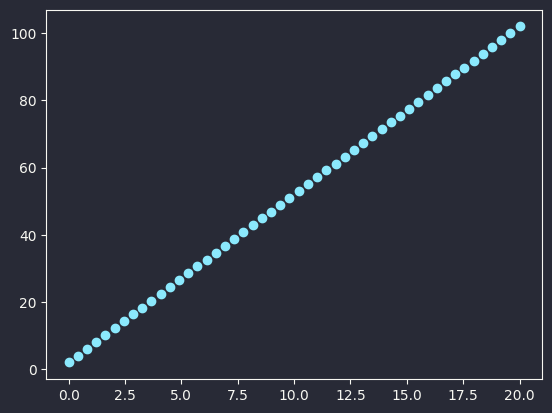

In [73]:
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

x = np.linspace(0, 20)
x = torch.tensor(x)
y = 5 * x + 2

plt.scatter(x.numpy(), y.numpy())

In [74]:
losses, w, b = gradient_descent(w, x, b, y, epochs=100, alpha=0.2)

tensor(nan, requires_grad=True) tensor(nan, requires_grad=True)


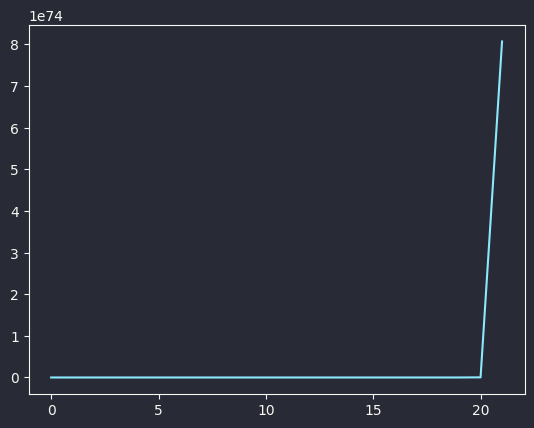

In [75]:
print(w, b)
plt.plot(losses)